## 1. Load and Visualize the data
- Download- use kaggle
- Load
- Visualize
- Normalization

In [1]:
#importing libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
X=pd.read_csv('Linear_X_Train.csv')
y=pd.read_csv('Linear_Y_Train.csv')

#Convert to Numpy Arrays
X=X.values
y=y.values

#normalisation
u=X.mean()
std=X.std()
X=(X-u)-std

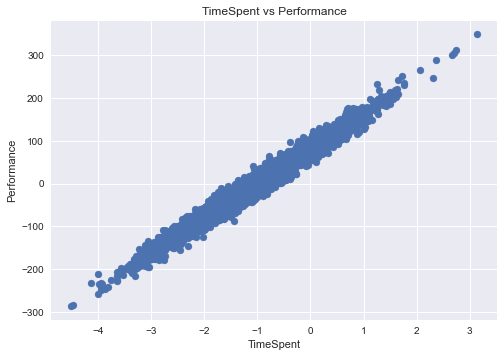

In [3]:
#Visualization
plt.style.use("seaborn")
plt.scatter(X,y)
plt.title("TimeSpent vs Performance")
plt.xlabel("TimeSpent")
plt.ylabel("Performance")
plt.show()

## 2. Linear Regression

In [4]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list
    

In [5]:
theta,error_list,theta_list = gradientDescent(X,y)

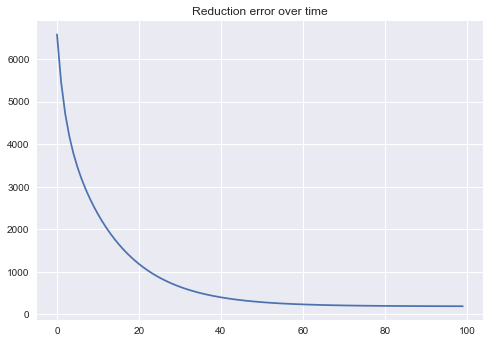

In [6]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [11]:
## 3.Predictions and Best Line
y_=hypothesis(X,theta)

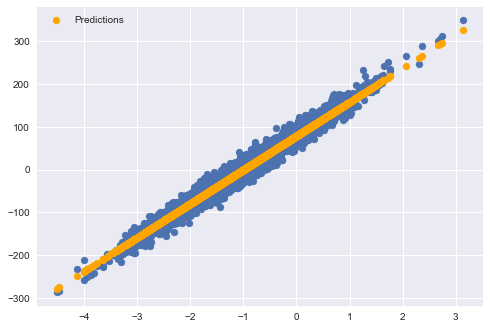

In [16]:
#plotting training and predictions together
plt.scatter(X,y)
plt.scatter(X,y_,color="orange",label="Predictions")
plt.legend()
plt.show()

In [17]:
# Load the test data and make predictions on it
X_test = pd.read_csv('Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [18]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [19]:
df.to_csv('y_prediction.csv',index=False)#saving our predictions as a CSV file

## 4. Computing Score
Score :- R^2 or Coefficient of determination

In [20]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [21]:
r2_score(y,y_)

97.06554009862239